Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64
               Date  number of bedrooms  

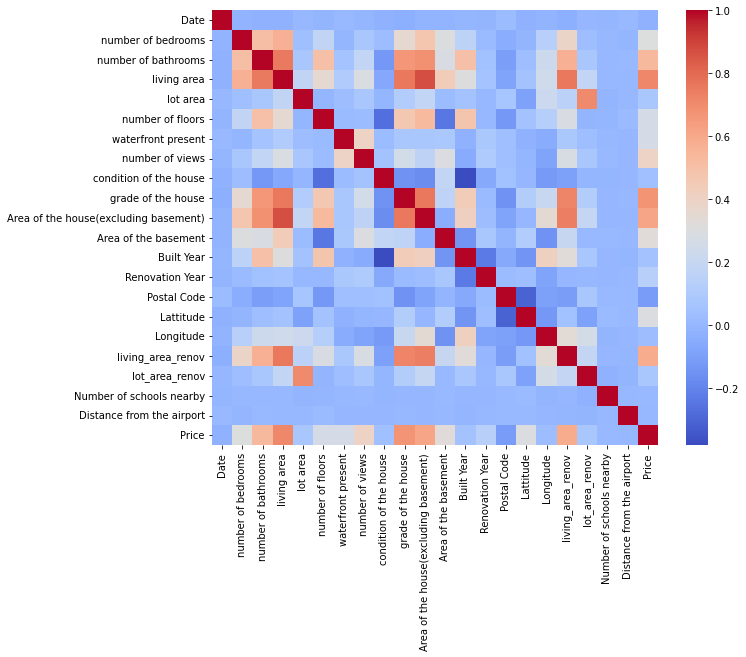

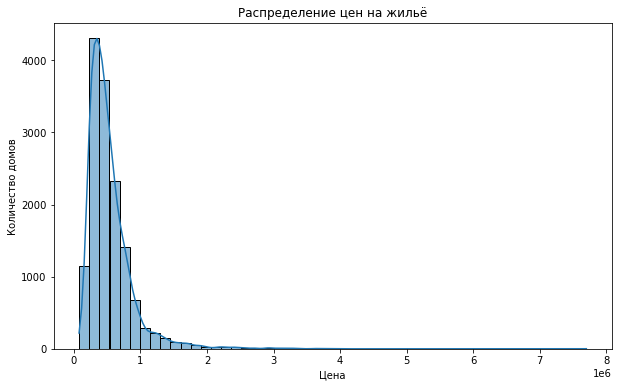

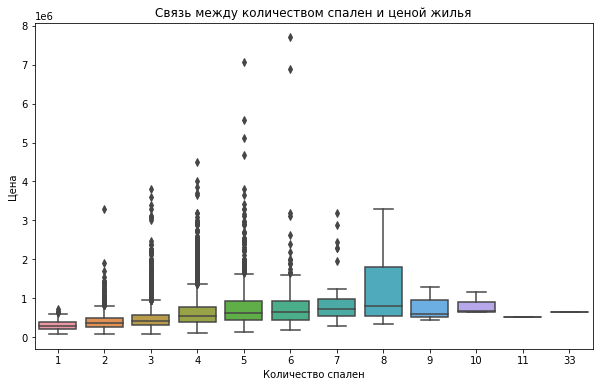

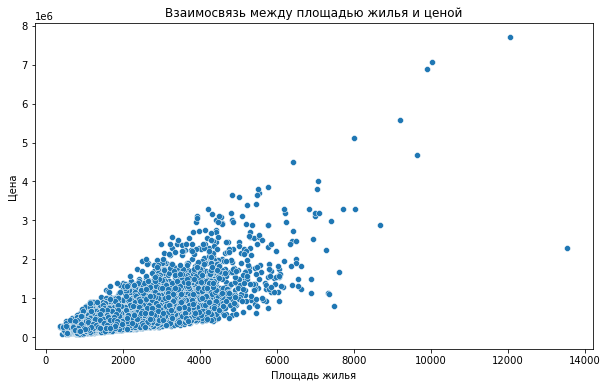

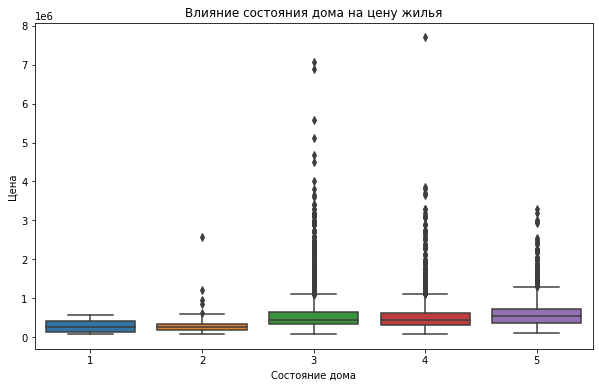

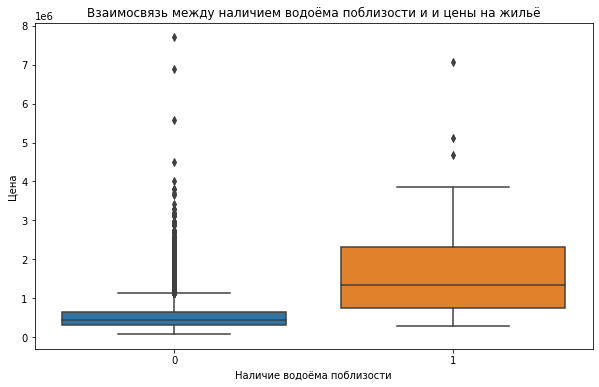

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Загрузка данных
df = pd.read_csv('House Price India.csv')
# Убираем столбец id. Так как он нам не понадобится.
df = df.drop('id', axis=1)
# Проверим наличие пропусков в данных
missing_data = df.isnull().sum()

# Обработка пропусков
for column, missing in missing_data.items():
    if missing > 0:  # Если в колонке есть пропуски
        if missing / df.shape[0] > 0.5:  # Если пропусков больше 50%
            df.drop(column, axis=1, inplace=True)  # Удаляем колонку
        else:
            # Выбираем метод заполнения пропусков в зависимости от типа данных
            if df[column].dtype in ['int64', 'float64']:
                # Для числовых данных используем медиану
                df[column].fillna(df[column].median(), inplace=True)
            else:
                # Для остальных типов данных
                df[column].fillna(df[column].mode()[0], inplace=True)

# Проверка результата обработки пропусков
print(df.isnull().sum())

###2

# Проведем основной анализ данных
print(df.describe())

# Построим корреляционную матрицу, чтобы увидеть связь между различными параметрами
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

# Посмотрим на распределение цен на дома
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Распределение цен на жильё')
plt.xlabel('Цена')
plt.ylabel('Количество домов')
plt.show()

# Посмотрим, как количество спален влияет на цену
plt.figure(figsize=(10, 6))
sns.boxplot(x='number of bedrooms', y='Price', data=df)
plt.title('Связь между количеством спален и ценой жилья')
plt.xlabel('Количество спален')
plt.ylabel('Цена')
plt.show()

# Посмотрим на взаимосвязь между площадью жилья и ценой
plt.figure(figsize=(10, 6))
sns.scatterplot(x='living area', y='Price', data=df)
plt.title('Взаимосвязь между площадью жилья и ценой')
plt.xlabel('Площадь жилья')
plt.ylabel('Цена')
plt.show()

# Посмотрим, как состояние дома влияет на цену
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition of the house', y='Price', data=df)
plt.title('Влияние состояния дома на цену жилья')
plt.xlabel('Состояние дома')
plt.ylabel('Цена')
plt.show()

# Посмотрим, как отдаленность от воды зависит на цену
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront present', y='Price', data=df)
plt.title('Взаимосвязь между наличием водоёма поблизости и и цены на жильё')
plt.xlabel('Наличие водоёма поблизости')
plt.ylabel('Цена')
plt.show()